In [9]:
import pandas as pd, numpy as np
import datetime
import random
from matplotlib import pyplot as plt
n_transactions = 2000

In [10]:
customer_cols = ['Customer Code', 'Customer Name', 'Customer Parent Code', 'Customer Parent Name', 'Contract ID']
cust_master = pd.DataFrame()

customer_codes = ["C"+"{0:05}".format(i) for i in range(1,151,1)]
customer_names = ["Customer "+"{0:03}".format(i) for i in range(1,151,1)]
customer_family_codes = ["CF"+"{0:04}".format(i) for i in range(1,7,1)]
customer_family_names = ["Customer Family "+"{0:03}".format(i) for i in range(1,7,1)]

cust_master[customer_cols[0]] = customer_codes
cust_master[customer_cols[1]] = customer_names


cust_master[customer_cols[2]] = random.choices(customer_family_codes,k=150)
cust_master[customer_cols[3]] = cust_master[customer_cols[2]].apply(lambda x: 'Customer Family '+ x[3:])

cust_master.head(2)

,Customer Code,Customer Name,Customer Parent Code,Customer Parent Name
0,C00001,Customer 001,CF0002,Customer Family 002
1,C00002,Customer 002,CF0004,Customer Family 004


In [11]:
prod_master_cols = ['Product Code', 'Product Name', 'Product Family Code', 'Product Family Name', 'Product Type', 'Product Segment', 'Manufacturing Site', 'Unit of Measure', 'Product Status', 'List Price', 'Contract ID']
prod_master = pd.DataFrame()

product_codes = ["P"+"{0:03}".format(i) for i in range(1,51,1)]
product_names = ["Product "+"{0:02}".format(i) for i in range(1,51,1)]
product_family_codes = ["PF"+"{0:03}".format(i) for i in range(1,18,1)]
product_family_names = ["Product Family "+"{0:03}".format(i) for i in range(1,18,1)]
product_types = ["Type"+"{0:03}".format(i) for i in range(1,9,1)]
product_segments = ["Prod.Seg. "+"{0:03}".format(i) for i in range(1,18,1)]
manufacturing_sites = ['New York', 'Chicago', 'Los Angeles', 'San Francisco', 'Washington DC', 'Houston']
unit_of_measure = ['KG']
product_status = ['Development', 'Active', 'Discontinued']

prod_master['Product Code'] = product_codes
prod_master['Product Name'] = product_names

listprice = np.round(np.random.exponential(100,len(product_codes)),0)

fvars = [product_family_codes, product_family_names, product_types, product_segments, manufacturing_sites, unit_of_measure, product_status]

for i in range(7):
    prod_master[prod_master_cols[i+2]] = random.choices(fvars[i],k=50)

prod_master['Product Family Name'] = prod_master['Product Family Code'].apply(lambda x: 'Product Family '+ x[3:])
prod_master.replace('Discontinued','Active',inplace=True)
prod_master.loc[45,'Product Status'] = 'Discontinued'
prod_master['List Price'] = listprice

prod_master.head(2)

,Product Code,Product Name,Product Family Code,Product Family Name,Product Type,Product Segment,Manufacturing Site,Unit of Measure,Product Status,List Price
0,P001,Product 01,PF013,Product Family 13,Type001,Prod.Seg. 004,San Francisco,KG,Active,58.0
1,P002,Product 02,PF010,Product Family 10,Type007,Prod.Seg. 003,Washington DC,KG,Development,211.0


In [12]:
sales_rep_names = ['George Washington', 'John Adams', 'Thomas Jefferson', 'James Madison', 'James Monroe', 'John Quincy Adams', 'Andrew Jackson', 'Martin Van Buren', 'William H. Harrison', 'John Tyler', 'James K. Polk',
              'Zachary Taylor', 'Millard Fillmore', 'Franklin Pierce', 'James Buchanan', 'Abraham Lincoln', 'Andrew Johnson', 'Ulysses S. Grant', 'Rutherford B. Hayes', 'James A. Garfield', 'Chester A. Arthur',
              'Grover Cleveland', 'Benjamin Harrison', 'Grover Cleveland', 'William McKinley', 'Theodore Roosevelt', 'William H. Taft', 'Woodrow Wilson', 'Warren G. Harding', 'Calvin Coolidge', 'Herbert Hoover',
              'Franklin D. Roosevelt', 'Harry Truman', 'Dwight D. Eisenhower', 'John F. Kennedy', 'Lyndon B. Johnson', 'Richard M. Nixon', 'Gerald R. Ford', 'James E. Carter', 'Ronald Reagan', 'George Bush',
              'Bill Clinton', 'George Bush', 'Barack Obama']
sales_rep_ids = ['SR'+'{0:03}'.format(i+1) for i in range(len(sales_rep_names))]
sales_reps = pd.DataFrame(list(zip(sales_rep_ids,sales_rep_names)), columns = ['Sales Rep ID', 'Sales Rep Name'])
sales_reps.head(2)

,Sales Rep ID,Sales Rep Name
0,SR001,George Washington
1,SR002,John Adams


In [13]:
cost_data_cols = ['Product Code', 'Year', 'Standard Cost (USD)', 'Conversion Cost (USD)','Standard Cost (Local Currency)', 'Conversion Cost (Local Currency)']
years = [2016,2017,2018]
#pd.merge(pd.DataFrame(list(zip([1]*100,product_codes)),columns=[0,'Product Code']),pd.DataFrame(list(zip([1]*3,years)),columns =[0,'Year']), how='outer', left_on=0, right_on=0)[cost_data_cols[:2]]
multi_cols = pd.MultiIndex.from_product([cost_data_cols[2:],years], names=['','Year'])
cost_data = pd.DataFrame(columns = multi_cols)
cost_data['Product Code'] = product_codes
basecost =  np.round(prod_master['List Price']*(np.random.rand(len(product_codes))*.5+.5))
cost_data[cost_data_cols[2],years[0]] = basecost
cost_data[cost_data_cols[2],years[1]] = np.round(cost_data[cost_data_cols[2],years[0]]*(1+np.random.rand(50)*.041))
cost_data[cost_data_cols[2],years[2]] = np.round(cost_data[cost_data_cols[2],years[1]]*(1+np.random.rand(50)*.041))

cost_data[cost_data_cols[3],years[0]] = np.round(basecost*(np.random.rand(50)*.35+.1))
cost_data[cost_data_cols[3],years[1]] = np.round(cost_data[cost_data_cols[3],years[0]]*(1+np.random.rand(50)*.041))
cost_data[cost_data_cols[3],years[2]] = np.round(cost_data[cost_data_cols[3],years[1]]*(1+np.random.rand(50)*.041))

cost_data[cost_data_cols[4]]=cost_data[cost_data_cols[2]]
cost_data[cost_data_cols[5]]=cost_data[cost_data_cols[3]]

cost_data = cost_data.set_index(cost_data_cols[0]).stack().reset_index()
cost_data['Year']= cost_data['Year'].astype(int)
cost_data.head(2)

,Product Code,Year,Conversion Cost (Local Currency),Conversion Cost (USD),Standard Cost (Local Currency),Standard Cost (USD)
0,P001,2016,9.0,9.0,34.0,34.0
1,P001,2017,9.0,9.0,35.0,35.0


In [14]:
inv_cols = ["Invoice Number", "Business Unit", "Department Code", "Customer Code", "Invoice Date", "Product Code", "Sales Rep ID", 
            "Ship To", "Not a Product?", "Invoice Amount (Local Currency)", "Invoice Amount (USD)", "Quantity"]

bu_list = ["BU-"+str(i) for i in range(1,4,1)]
dept_codes = ["Dept-"+"{0:03}".format(i) for i in range(1,15,1)]
# site_list = ["Tokyo", "New York", "Los Angeles", "London", "Chicago", "Paris", "Mexico City", "Philadelphia", "Buenos Aires", "Hong Kong", "Berlin", "Bangkok", "Singapore", "Delhi"]
time_period = [datetime.date(2016,1,1)+datetime.timedelta(days=i) for i in range(365*3+1)]
ship_to = ["USA", "Germany", "Italy", "Japan", "France", "China", "India", "UK", "Thailand", "Singapore"]
invoice_numbers = ["I"+"{0:05}".format(i) for i in range(1,n_transactions+1,1)]

fvars = [bu_list, dept_codes, customer_codes, time_period, product_codes, sales_rep_ids, ship_to]

transaction_data = pd.DataFrame()
transaction_data['Invoice Number'] = invoice_numbers
for i in range(7):
    transaction_data[inv_cols[i+1]] = random.choices(fvars[i],k=n_transactions)
transaction_data['Not a Product?']= False
transaction_data['Quantity'] = np.round(np.random.f(200,100,n_transactions)*np.random.rand(n_transactions)*500,0)

transaction_data['List Price'] = pd.merge(transaction_data[['Invoice Number', 'Product Code']], prod_master[['Product Code','List Price']], how='left')['List Price']
transaction_data['Invoice Amount (USD)'] = np.round(pd.merge(transaction_data[['Invoice Number', 'Product Code']], prod_master[['Product Code','List Price']], how='left')['List Price']*(np.random.rand()*.25+.75)*transaction_data['Quantity'])
transaction_data["Invoice Amount (Local Currency)"] = transaction_data['Invoice Amount (USD)']

transaction_data = transaction_data[inv_cols]
transaction_data.head(2)

,Invoice Number,Business Unit,Department Code,Customer Code,Invoice Date,Product Code,Sales Rep ID,Ship To,Not a Product?,Invoice Amount (Local Currency),Invoice Amount (USD),Quantity
0,I00001,BU-3,Dept-011,C00106,2018-08-23,P015,SR008,Thailand,False,20032.0,20032.0,157.0
1,I00002,BU-2,Dept-008,C00137,2017-03-24,P046,SR023,USA,False,17297.0,17297.0,152.0


In [15]:
from functools import reduce
def mergefun(left,right):
    return pd.merge(left,right,how='left',validate = 'many_to_one')
transaction_data['Year'] = transaction_data['Invoice Date'].map(lambda x: x.year)
tables = [transaction_data,sales_reps,prod_master,cust_master,cost_data]
cube = reduce(mergefun,tables)
cube.drop('Year',axis=1,inplace=True)
print(cube.columns, cube.shape)
cube.head()

Index(['Invoice Number', 'Business Unit', 'Department Code', 'Customer Code',
       'Invoice Date', 'Product Code', 'Sales Rep ID', 'Ship To',
       'Not a Product?', 'Invoice Amount (Local Currency)',
       'Invoice Amount (USD)', 'Quantity', 'Sales Rep Name', 'Product Name',
       'Product Family Code', 'Product Family Name', 'Product Type',
       'Product Segment', 'Manufacturing Site', 'Unit of Measure',
       'Product Status', 'List Price', 'Customer Name', 'Customer Parent Code',
       'Customer Parent Name', 'Conversion Cost (Local Currency)',
       'Conversion Cost (USD)', 'Standard Cost (Local Currency)',
       'Standard Cost (USD)'],
      dtype='object') (2000, 29)


,Invoice Number,Business Unit,Department Code,Customer Code,Invoice Date,Product Code,Sales Rep ID,Ship To,Not a Product?,Invoice Amount (Local Currency),...,Unit of Measure,Product Status,List Price,Customer Name,Customer Parent Code,Customer Parent Name,Conversion Cost (Local Currency),Conversion Cost (USD),Standard Cost (Local Currency),Standard Cost (USD)
0,I00001,BU-3,Dept-011,C00106,2018-08-23,P015,SR008,Thailand,False,20032.0,...,KG,Active,148.0,Customer 106,CF0001,Customer Family 001,30.0,30.0,83.0,83.0
1,I00002,BU-2,Dept-008,C00137,2017-03-24,P046,SR023,USA,False,17297.0,...,KG,Discontinued,132.0,Customer 137,CF0004,Customer Family 004,30.0,30.0,73.0,73.0
2,I00003,BU-3,Dept-007,C00042,2017-05-30,P039,SR038,Thailand,False,207.0,...,KG,Development,8.0,Customer 042,CF0005,Customer Family 005,1.0,1.0,6.0,6.0
3,I00004,BU-3,Dept-005,C00138,2018-04-14,P042,SR007,Thailand,False,120996.0,...,KG,Development,344.0,Customer 138,CF0001,Customer Family 001,141.0,141.0,326.0,326.0
4,I00005,BU-3,Dept-005,C00063,2017-01-04,P025,SR017,Italy,False,0.0,...,KG,Active,0.0,Customer 063,CF0002,Customer Family 002,0.0,0.0,0.0,0.0


In [16]:
cube['Margin (USD)'] =  cube['Invoice Amount (USD)'] - cube['Quantity']*cube['Standard Cost (USD)']
cube['Margin (%)'] =  cube['Margin (USD)']/cube['Invoice Amount (USD)']
cube['Conversion %'] = cube['Conversion Cost (USD)']/cube['Standard Cost (USD)']
relc = ['Invoice Amount (USD)', 'Quantity', 'Conversion Cost (USD)', 'Standard Cost (USD)', 'Margin (USD)','Margin (%)']
def plf(column_name):
    plt.hist(cube[cube[column_name].notna()][column_name],50)

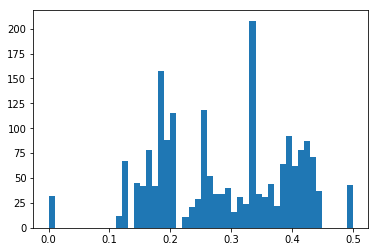

In [17]:
plf('Conversion %')

In [18]:
cp = cube.groupby('Product Code').sum()

In [19]:
cp['Margin (%)'] = cp['Margin (USD)']/cp['Invoice Amount (USD)']

In [20]:
cube['Year'] = cube['Invoice Date'].map(lambda x: x.year)

In [21]:
cy = cube.groupby('Year').sum()

In [22]:
cy['Margin (USD)']/cy['Invoice Amount (USD)']

Year
2016    0.154204
2017    0.145139
2018    0.133362
dtype: float64

In [31]:
cube.to_excel('Data_Cube.xlsx')

In [23]:
cube.head()

,Invoice Number,Business Unit,Department Code,Customer Code,Invoice Date,Product Code,Sales Rep ID,Ship To,Not a Product?,Invoice Amount (Local Currency),...,Customer Parent Code,Customer Parent Name,Conversion Cost (Local Currency),Conversion Cost (USD),Standard Cost (Local Currency),Standard Cost (USD),Margin (USD),Margin (%),Conversion %,Year
0,I00001,BU-3,Dept-011,C00106,2018-08-23,P015,SR008,Thailand,False,20032.0,...,CF0001,Customer Family 001,30.0,30.0,83.0,83.0,7001.0,0.349491,0.361446,2018
1,I00002,BU-2,Dept-008,C00137,2017-03-24,P046,SR023,USA,False,17297.0,...,CF0004,Customer Family 004,30.0,30.0,73.0,73.0,6201.0,0.358501,0.410959,2017
2,I00003,BU-3,Dept-007,C00042,2017-05-30,P039,SR038,Thailand,False,207.0,...,CF0005,Customer Family 005,1.0,1.0,6.0,6.0,27.0,0.130435,0.166667,2017
3,I00004,BU-3,Dept-005,C00138,2018-04-14,P042,SR007,Thailand,False,120996.0,...,CF0001,Customer Family 001,141.0,141.0,326.0,326.0,-12012.0,-0.099276,0.432515,2018
4,I00005,BU-3,Dept-005,C00063,2017-01-04,P025,SR017,Italy,False,0.0,...,CF0002,Customer Family 002,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2017


In [30]:
sales_reps['Sales Rep Name'].apply(lambda x: x.split()[0]).value_counts()

James         6
John          4
George        3
William       3
Franklin      2
Grover        2
Andrew        2
Ronald        1
Harry         1
Benjamin      1
Woodrow       1
Millard       1
Theodore      1
Dwight        1
Bill          1
Lyndon        1
Gerald        1
Abraham       1
Thomas        1
Martin        1
Chester       1
Zachary       1
Rutherford    1
Warren        1
Barack        1
Richard       1
Herbert       1
Calvin        1
Ulysses       1
Name: Sales Rep Name, dtype: int64